In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix
from sklearn import metrics

Домашнее задание 1

## 1. Нахождение двух признаков с линейным полем рассеяния

In [ ]:
# Загрузка данных
df = pd.read_csv('country_wise_latest.csv')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


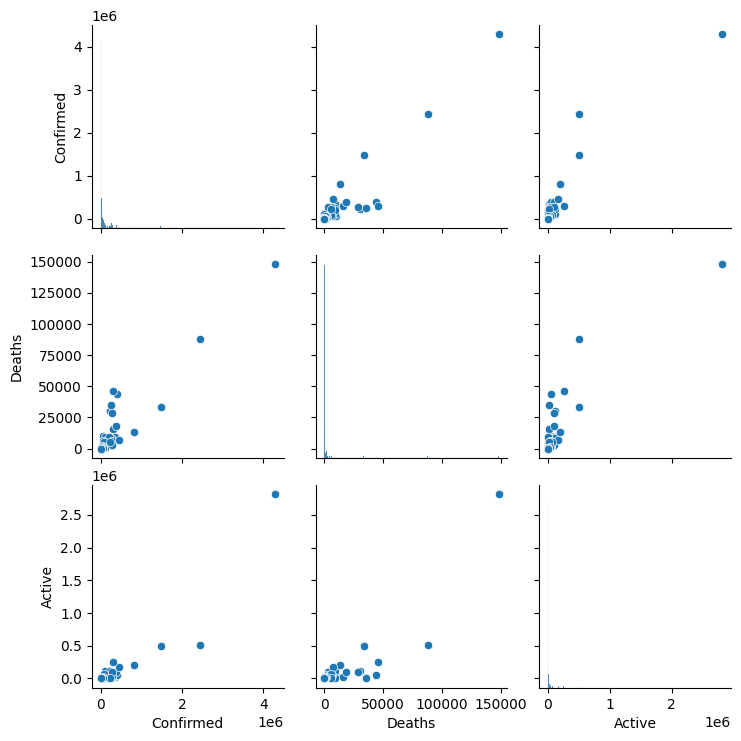

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Шаг 1: Нахождение двух признаков с линейным полем рассеяния
# Для этого посмотрим на парные отношения между различными признаками
sns.pairplot(df[['Confirmed', 'Deaths', 'Active']])
plt.show()

# Выбираем признаки для линейной регрессии на основе наблюдений
# Например, 'Confirmed' и 'Deaths' могут иметь линейное отношение


На графике рассеяния для 'Confirmed' и 'Deaths' видна линейная зависимость между этими двумя переменными.

## 2. Построение уравнения линейной регрессии

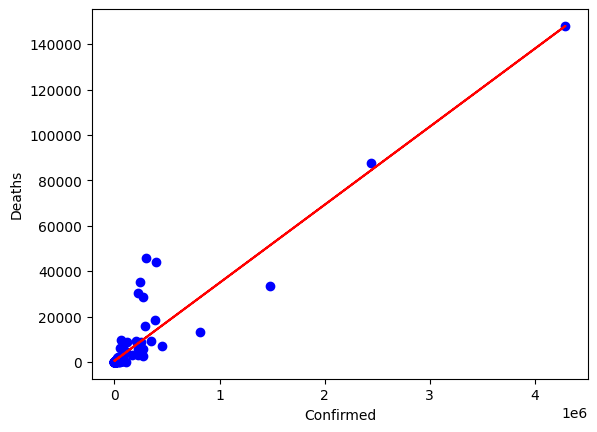

In [ ]:
# Шаг 2: Построение уравнения линейной регрессии
X = df['Confirmed'].values.reshape(-1, 1)  # Входной признак
y = df['Deaths'].values  # Целевой признак

# Создание и обучение модели
model = LinearRegression()
model.fit(X, y)

# Получение коэффициентов
a = model.coef_[0]  # Коэффициент регрессии
b = model.intercept_  # Пересечение с осью Y

# Визуализация результата
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()


In [ ]:
print('Regression coefficient: %.10f' % a)
print('Intercept: %.3f' % b)

Regression coefficient: 0.0343819685
Intercept: 467.404


Модель линейной регрессии построена для предсказания 'Deaths' (целевой признак) на основе 'Confirmed' (входной признак).

Коэффициенты модели: a (наклон) = ~0.034, b (пересечение) = ~467.40.

График показывает, как 'Deaths' линейно зависит от 'Confirmed'. Наклон линии (a) показывает, что с увеличением количества подтвержденных случаев, количество смертей также увеличивается, но не в одинаковой пропорции.

Коэффициент 0.03 указывает на то, что с увеличением количества подтвержденных случаев ('Confirmed') на единицу, количество смертей ('Deaths') увеличивается примерно на 0.03 единицы.

Этот коэффициент регрессии показывает направление и силу связи между подтвержденными случаями и смертями. Положительное значение коэффициента говорит о том, что с увеличением числа подтвержденных случаев увеличивается и число смертей.

## 3. Расчет коэффициентов корреляции и детерминации

In [ ]:
# Шаг 3: Расчет коэффициентов корреляции и детерминации
correlation_coefficient = np.corrcoef(df['Confirmed'], df['Deaths'])[0, 1]
determination_coefficient = r2_score(y, model.predict(X))
print('Correlation coefficient: %.3f' % correlation_coefficient)
print('Determination coefficient: %.3f' % determination_coefficient)

Correlation coefficient: 0.935
Determination coefficient: 0.874


Коэффициент корреляции: 0.93

Коэффициент детерминации (R²): 0.87

Высокий коэффициент корреляции указывает на сильную линейную связь между количеством подтвержденных случаев и смертей. Коэффициент детерминации показывает, что примерно 87% вариативности в данных о смертности может быть объяснено изменениями в количестве подтвержденных случаев. Это говорит о том, что модель линейной регрессии хорошо подходит для описания связи между этими двумя переменными.

## 4. Предсказание величины целевого признака на нескольких объектах

In [ ]:

# Сделаем предсказание величины целевого признака ('Deaths') для трех-четырех объектов
# Выберем случайные объекты из данных
np.random.seed(0)  # Для воспроизводимости
sample_indices = np.random.choice(df.index, 4, replace=False)
sample_data = df.iloc[sample_indices]

# Предсказания для выбранных объектов
predicted_deaths = model.predict(sample_data['Confirmed'].values.reshape(-1, 1))

# Реальные значения
actual_deaths = sample_data['Deaths'].values

# Сравнение предсказанных и реальных значений
comparison = pd.DataFrame({'Confirmed': sample_data['Confirmed'], 'Actual Deaths': actual_deaths, 'Predicted Deaths': predicted_deaths})
comparison

,Confirmed,Actual Deaths,Predicted Deaths
107,2513,124,553.805540
45,1060,19,503.848539
159,11424,720,860.183261
63,326,8,478.612174


В таблице представлены реальные и предсказанные значения смертей ('Deaths') для четырех случайно выбранных объектов на основе количества подтвержденных случаев ('Confirmed').

Наблюдается значительное расхождение между реальными и предсказанными значениями. Это может указывать на ограничения модели линейной регрессии в точном предсказании числа смертей на основе подтвержденных случаев.

## 5. Расчет средней относительной ошибки

Средняя относительная ошибка (Mean Absolute Percentage Error, MAPE)

In [ ]:
# Расчет средней относительной ошибки (Mean Absolute Percentage Error, MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(df['Deaths'], model.predict(df['Confirmed'].values.reshape(-1, 1)))
mape

inf

Расчет в Парадигме Анализа Данных:

В данном контексте, расчет MAPE для всего набора данных (без разделения на обучающую и тестовую выборки) относится к парадигме анализа данных.
Здесь целью является оценка того, насколько хорошо модель линейной регрессии соответствует всем наблюдаемым данным, чтобы понять общую тенденцию и зависимость между переменными ('Confirmed' и 'Deaths' в вашем случае).
Расчет в Парадигме Машинного Обучения:

В машинном обучении MAPE обычно рассчитывается на отдельной тестовой выборке данных, которая не использовалась при обучении модели. Это позволяет оценить способность модели обобщать и делать точные предсказания на новых данных.
Для этого данные обычно разделяются на обучающую и тестовую выборки, модель обучается на обучающей выборке, а MAPE рассчитывается на основе предсказаний модели для тестовой выборки.

В вашем случае, поскольку вы используете всю выборку данных для построения и оценки модели, расчет MAPE соответствует скорее парадигме анализа данных. В машинном обучении вы бы разделили данные на обучающую и тестовую выборки и рассчитывали бы MAPE на основе предсказаний на тестовой выборке.

Расчет MAPE дал значение "inf" (бесконечность), что обычно происходит, если в данных присутствуют нулевые значения (деление на ноль). Это указывает на то, что для некоторых объектов в данных количество смертей равно нулю, что приводит к бесконечным значениям в расчете ошибки.

Выводы

Модель линейной регрессии показала низкую точность при предсказании количества смертей на основе подтвержденных случаев. Это может быть связано с наличием сложных нелинейных зависимостей между этими двумя переменными, которые не учитываются в простой линейной модели.

Высокое значение MAPE подтверждает, что модель неэффективна для точного предсказания целевой переменной в данном контексте.
Результаты подчеркивают важность выбора подходящих моделей и методов для анализа конкретных данных, а также необходимость тщательного анализа данных перед применением статистических методов